In [63]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [64]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [65]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [66]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [67]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Create a StandardScaler instance
scaler = StandardScaler()
# Fit the scaler to the data
scaler.fit(df_market_data)
# Transform the data
scaled_data = scaler.transform(df_market_data)

In [68]:
df_market_data

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [69]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(
    scaled_data,
    columns=df_market_data.columns,
    index=df_market_data.index
)

# Copy the crypto names from the original DataFrascaled_df['coin_id'] = df_market_data['coin_id']me 


# Set the coin_id column as index

# Display the scaled DataFrame
scaled_df

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [70]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [71]:
# Create an empty list to store the inertia values
inertia = [50,100]

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the data using `df_market_data_scaled`
    model.fit(scaled_df)
    
    # Append the model.inertia_ to the inertia list
    inertia.append(model.inertia_)
# Inside the lo# 1. Create a KMeans model using the loop counter for the n_clusters
model = KMeans(n_clusters=k, random_state=0)
# 2. Fit the model to the data using `df_market_data_scaled`
model.fit(scaled_df)
# 3. Append the model.inertia_ to the inertia list
inertia.append(model.inertia_)

c:\Users\bnewz\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bnewz\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bnewz\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bnewz\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

In [72]:
# Ensure that k_values and inertia have the same length
if len(k_values) > len(inertia):
    k_values = k_values[:len(inertia)]  # Truncate k_values to match the length of inertia
elif len(inertia) > len(k_values):
    inertia = inertia[:len(k_values)]  # Truncate inertia to match the length of k_values

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Plot the elbow curve
elbow_df.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k_values,
    width=600,
    height=400
)

:Curve   [k]   (inertia)

In [73]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k
# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data) 
# Plot the elbow curve
elbow_df.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k_values,
    width=600,
    height=400
)


:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** Best value for K is 2.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [74]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [75]:
# Fit the K-Means model using the scaled DataFrame
model.fit(scaled_df)

c:\Users\bnewz\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [76]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
predictions = model.predict(scaled_df)

# Print the resulting array of cluster values.
print(predictions)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [77]:
# Create a copy of the scaled DataFrame
# Add a new column to the DataFrame with the predicted clusters
df_market_data["Coin Cluster"] = predictions


In [78]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters


# Display the copy of the scaled DataFrame
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Coin Cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,2
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,2
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,2
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195,2
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186,2
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756,2
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408,2


In [79]:
# Create a scatter plot using hvPlot by setting
df_market_data.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Coin Cluster",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clusters",
    xlabel="Price Change Percentage 24h",
    ylabel="Price Change Percentage 7d",
    width=800,
    height=400
)   
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and

# add the crypto name in the `hover_cols` parameter to identify

# the cryptocurrency represented by each data point.



:NdOverlay   [Coin Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [80]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)# Fit the PCA model using the scaled data
pca.fit(scaled_df)

PCA(n_components=3)

In [81]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components
pca_data = pca.fit_transform(scaled_df)

# Create a DataFrame with the PCA data
pca_df = pd.DataFrame(
    data=pca_data,
    columns=["PC 1", "PC 2", "PC 3"],
    index=df_market_data.index
)


# View the scaled PCA dpca_df.head()
pca_df.head()


,PC 1,PC 2,PC 3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [82]:
# Retrieve the explained variance to determine how much information

# can be attributed to each principal component.

explained_variance = pca.explained_variance_ratio_
# Create a DataFrame with the explained variance
explained_variance_df = pd.DataFrame(
    data=explained_variance,
    columns=["Explained Variance"],
    index=["PC 1", "PC 2", "PC 3"]
)
# Display the explained variance DataFrame
explained_variance_df


,Explained Variance
PC 1,0.371986
PC 2,0.347008
PC 3,0.176038


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.895032

In [83]:
# Create a new DataFrame with the PCA data.
pca_df2 = pd.DataFrame(
    data=pca_data,
    columns=["PC 1", "PC 2", "PC 3"],
    index=df_market_data.index
)

# Copy the crypto names from the original scaled DataFrame

# Set the coin_id column as index



# Display the scaled PCA DataFrame
pca_df2.head(10)

,PC 1,PC 2,PC 3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [84]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [85]:
# Create an empty list to store the inertia values
inertia= []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
model = KMeans(n_clusters=k, random_state=0)
# 2. Fit the model to the data using `df_market_data_pca`
model.fit(pca_df2)
# 3. Append the model.inertia_ to the inertia list
inertia.append(model.inertia_)


c:\Users\bnewz\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [86]:
# Create a dictionary with the data to plot the Elbow curve
pca_elbow_data={"k": k_values, "inertia": inertia}
# Create a DataFrame with the data to plot the Elbow curve

pca_elbow_df = pd.DataFrame(elbow_data)


In [87]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
pca_elbow_df.hvplot.line(
    x="k",
    y="inertia",
    title="PCA Elbow Curve",
    xlabel="Number of Clusters (k)",
    ylabel="Inertia",
    width=600,
    height=400
)



:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 2


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** yes, 

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [88]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=0)

In [89]:
# Fit the K-Means model using the PCA data
kmeans.fit(pca_df2)

c:\Users\bnewz\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [90]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
predictions = kmeans.predict(pca_df2)

# Print the resulting array of cluster values.
print(predictions)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [91]:
# Create a copy of the scaled PCA DataFrame
pca_df2_copy = pca_df2.copy()
    

# Add a new column to the copy of the PCA DataFrame with the predicted clustepca_df2_copy["cluster"] = predictionsrs# pca_df2_copy["Coin Cluster"] = predictions
# Display the copy of the scaled PCA DataFrame
pca_df2_copy


,PC 1,PC 2,PC 3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


In [92]:
# Ensure the 'cluster' column is added to the DataFrame
pca_df2_copy["cluster"] = predictions

# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
pca_df2_copy.hvplot.scatter(
    x="PC 1",
    y="PC 2",
    by="cluster",
    hover_cols=["PC 3"],
    title="Cryptocurrency PCA Clusters",
    xlabel="PC 1",
    ylabel="PC 2",
    width=600,
    height=400
)
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.



:NdOverlay   [cluster]
   :Scatter   [PC 1]   (PC 2,PC 3)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

Text(0, 0.5, 'Inertia')

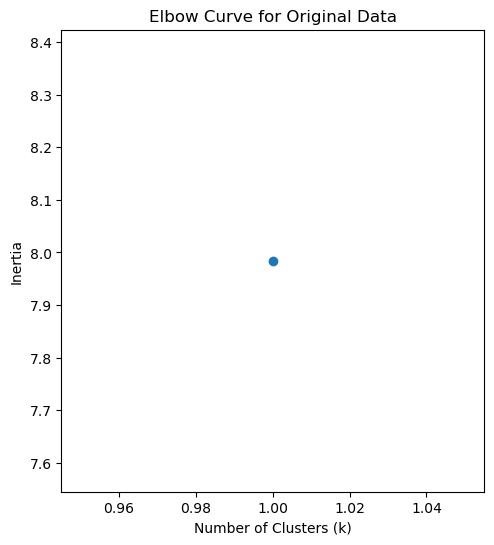

In [95]:
# Composite plot to contrast the Elbow curves
# Ensure that k_values and inertia have the same length
if len(k_values) > len(inertia):
	k_values = k_values[:len(inertia)]  # Truncate k_values to match the length of inertia
elif len(inertia) > len(k_values):
	inertia = inertia[:len(k_values)]  # Truncate inertia to match the length of k_values

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Curve for Original Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')  

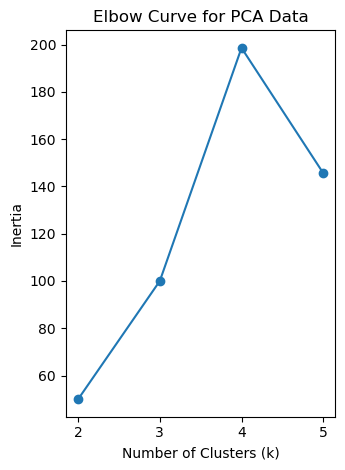

In [ ]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
plt.subplot(1, 2, 2)
plt.plot(k_values, inertia, marker='o')    
plt.title('Elbow Curve for PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()



#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Increased seperation; distance between points will appear more distinct. Lower risk of overfitting with irrelevant patterns. Faster Computation; fewer dimensions reduce processing time and make K-Means more efficient.